<a href="https://colab.research.google.com/github/lightweightcobra/Machine-Learning/blob/main/ADITYA_KUMAR_CS_IT308_LAB_3_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IIIT Vadodara </center>
## <center> Winter 2023-24 </center>
## <center> CS/IT 308, CS 652, CS8XX Machine Learning Lab </center>
## <center> Lab#3 Principal component analysis (PCA) and Data generating process </center>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio
from mpl_toolkits import mplot3d

## <font color='red'> 1. Implement PCA for 2D Data.

In this experiment consider 200 samples and obtain the matrix $X$ in $X = C \times D$, where $C=\begin{bmatrix}
1 & 2 \\
1 & 1 \end{bmatrix}$ and $D$ is the randomly generated matix using samples. <font>


Hint for Code: Use np.linalg.eig, np.diag, np.matmul, np.cov

In [ ]:
# 2D Data for example
# Find X
C = np.array([[1, 2], [1, 1]])
D = np.random.rand(2, 200)
X = np.matmul(C, D)


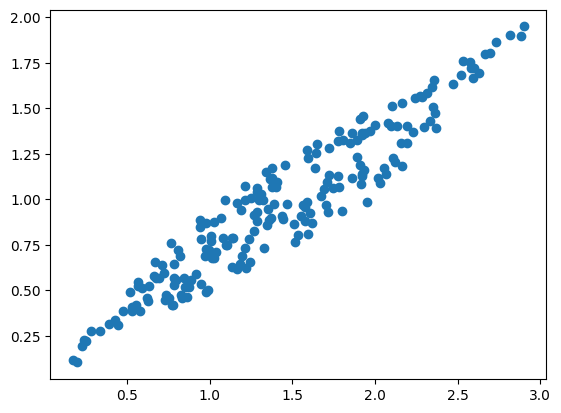

In [ ]:
# code to scatter plot X
plt.scatter(X[0, :], X[1, :])

### Implement PCA
Hint: refer class note

In [ ]:
# Write code to impement PCA
cov_x = np.cov(X)
E, P = np.linalg.eig(cov_x)
print("Eigen Values: ", E)
print("Eigen Vectors:", P)

Eigen Values:  [0.57017474 0.01124216]
Eigen Vectors: [[ 0.84681168 -0.53189282]
 [ 0.53189282  0.84681168]]


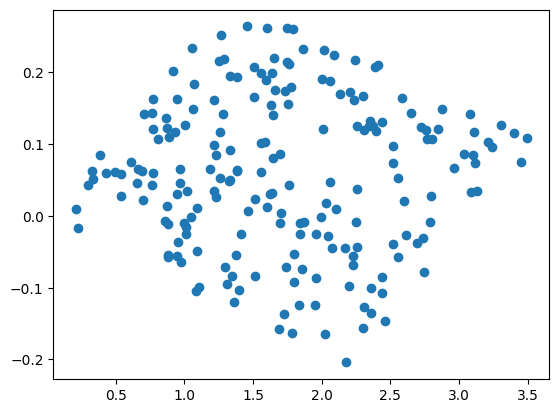

In [ ]:
# Transform data to new coordinates
# scatter plot Y
Y = np.matmul(P.T, X)
plt.scatter(Y[0, :], Y[1, :])

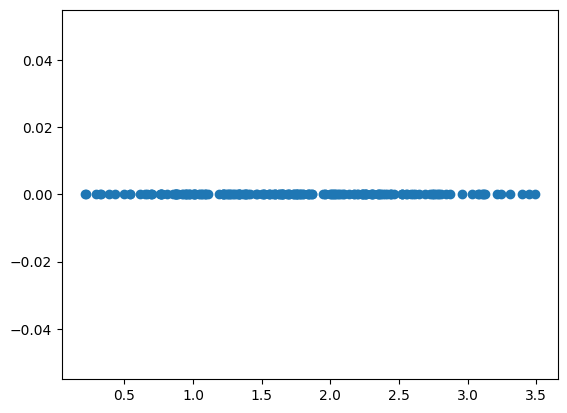

In [ ]:
#Approximate each 2-point data vector using one values
Y[-1,:]=0
# scatter plot Y

plt.scatter(Y[0,:], Y[1,:])


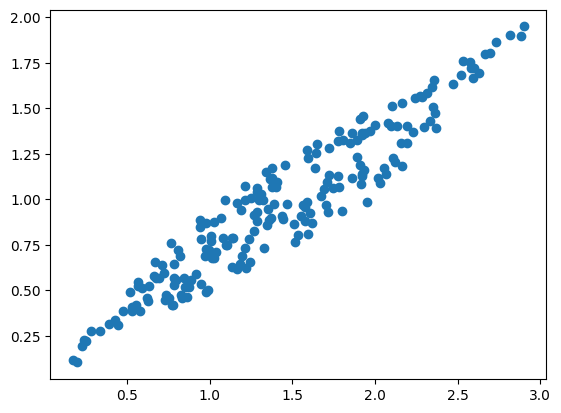

In [ ]:
#Transform back to original coordinates
PP = P.T
PP = PP[:,:-1]
YY = Y[:-1,:]
X_approx = np.matmul(PP, YY)

# scatter plt X_approx

plt.scatter(X[0, :], X[1,:])


## <font color='red'> 2. Implement PCA for 3D Data.
In this experiment consider 200 samples and obtain the matrix $X$ in $X = C \times D$, where $$C=\begin{bmatrix}
1&2&-1\\
2&2&1\\
-2&0&2\\
\end{bmatrix}$$ and $D$ is the randomly generated matix using samples. <font>

Hint for Code: Use np.linalg.eig, np.diag, np.matmul, np.cov

In [ ]:
# Write 3D Data and find X
C = np.array([[1, 2, -1], [2, 2, 1], [-2, 0, 2]]);
D = np.random.rand(3, 200)
X = np.matmul(C, D)


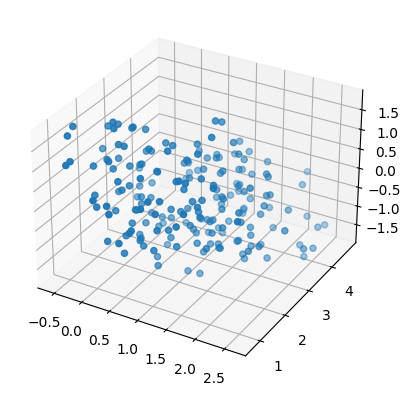

In [ ]:
# write code to scatter plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0, :], X[1, :], X[2, :])
plt.show()

### Implement PCA
Hint: refer class note.

In [ ]:
#Write code here
cov_X = np.cov(X)
E, P = np.linalg.eig(cov_X)

print('eigen values=',E)
print('eigen vectors=\n',P)

eigen values= [1.22141625 0.1088411  0.5438193 ]
eigen vectors=
 [[ 0.56896832  0.82227918  0.0114889 ]
 [ 0.64061514 -0.45194108  0.62077492]
 [-0.5156426   0.3458413   0.78390465]]


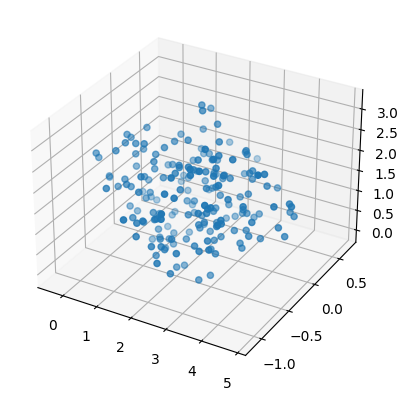

In [ ]:
# Transform data to new coordinates
#P = P.T
#Y = P*X
Y = np.matmul(P.T, X)

#Scatter plt Y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y[0, :], Y[1, :], Y[2, :])
plt.show()



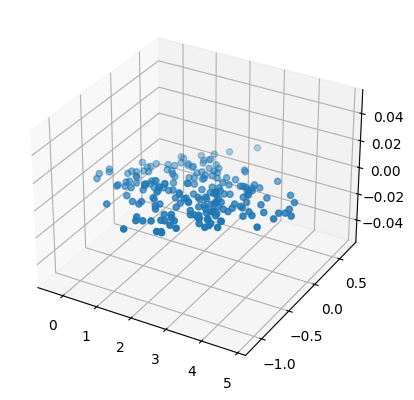

In [ ]:
#Approximate each 3-point data vector using two values
Y[2,:] = 0

#Scatter plot Y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y[0, :], Y[1, :], Y[2, :])
plt.show()


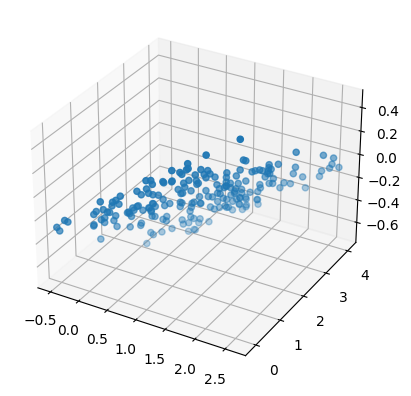

In [ ]:
#Transform back to original coordinates
PP = P.T
PP = PP[:,:-1]
YY = Y[:-1,:]
X_approx = np.matmul(PP, YY)



#Scatter plot X_approx

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_approx[0, :], X_approx[1, :], X_approx[2, :])
plt.show()

## <font color='red'> 3. Implement PCA for image compression.<font>
    Methodology: A set of face images is used to generate a basis matrix using PCA. Essentially this basis matrix would the input data which are correlated observations from the real world. By preserving different number of eigenvectors, different degrees of compression can be achieved.
    
    

You can use this link for face images:

https://drive.google.com/file/d/1XMtBihZypbE-zlg_DuAW63IF4vX4cn3d/view?usp=sharing

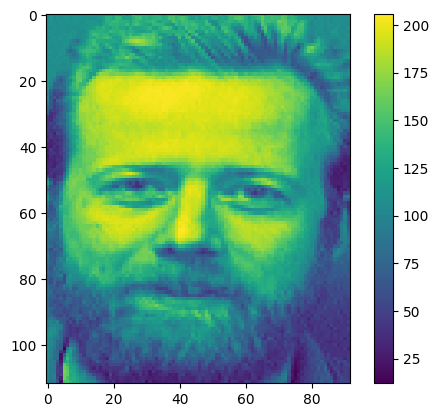

In [ ]:
image_list = glob.glob('*pgm') # to read all images

X1=mpimg.imread(image_list[3])
plt.imshow(X1)
plt.colorbar()
[m, n] = np.shape(X1)
# print("M:", m)
# print("N:", n)

<BarContainer object of 40 artists>

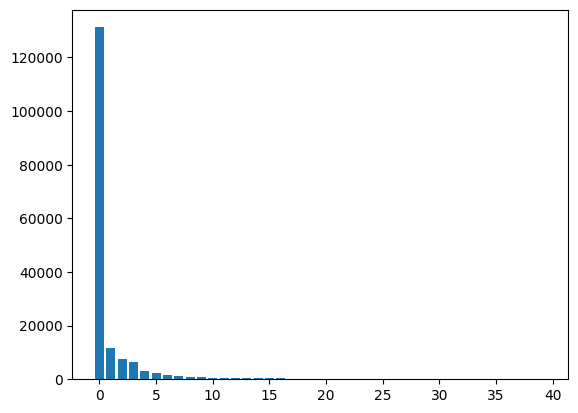

In [ ]:
#plot Eigen values of covariance matrix
cov=np.cov(X1.T)
eigenvalues,eigenvectors =np.linalg.eig(cov)
plt.bar(range(40),eigenvalues[:40])

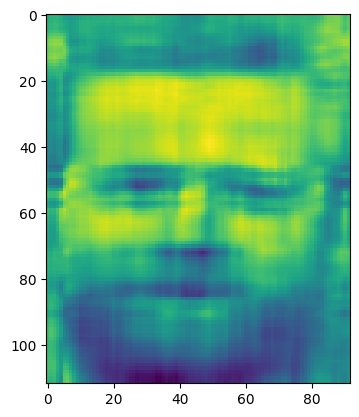

In [ ]:
#write code for PCA and approximate each data vector using few significant eigen values

# Let n will be the number of components
def PCA(image_data, n):
  image_data = image_data - np.mean(image_data,axis = 0)
  cov = np.cov(image_data.T)
  E, P=np.linalg.eig(cov)
  P = P.T
  ind = np.argsort(E)
  ind = ind[::-1]
  E = E[ind]
  P = P[ind]

  # choosing top n components
  comp = P[:n]
  Y = np.dot(image_data, comp.T)
  new_data = np.dot(Y, comp)

  return new_data, Y, comp

plt.imshow(PCA(X1,5)[0])


### <font color='red'> Homework: Implement PCA for remote sensing image.<font>
    Methodology: A set of remotely sensed images (Cuprite hyperspectral data having 188 bands) is used to generate a basis matrix based on PCA, and this matrix would be used to uncorrelate the data which are correlated. By preserving different number of eigenvectors different degrees of compression can be achieved. Find the variance of the input and output in each case and note the observations.

You can use this link for Cuprite images:

https://drive.google.com/file/d/1XMtBihZypbE-zlg_DuAW63IF4vX4cn3d/view?usp=sharing

In [ ]:
mat_data = sio.loadmat('cuprite.mat')
X = mat_data['x']



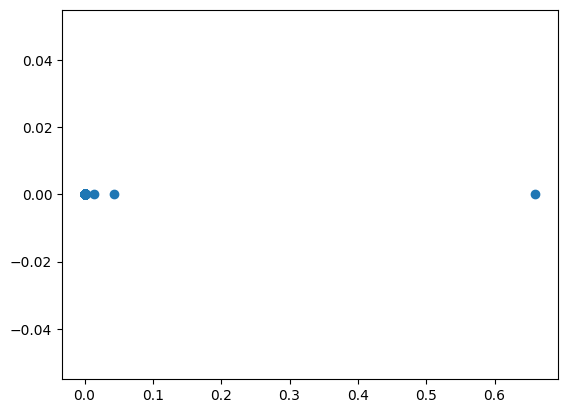

In [ ]:
#plot Eigen values of covariance matrix

mean = np.mean(X, axis= 1)
m, n = X.shape

X_norm = X - mean[:, np.newaxis]
Cx = np.cov(X_norm)

eigenvalues, eigenvectors = np.linalg.eig(Cx)
ind = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[ind]
eigenvectors = eigenvectors[:, ind]
normalized_eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

plt.scatter(eigenvalues, np.zeros_like(eigenvalues))
plt.show()


In [ ]:
#write code for PCA and approximate each data vector using few significant eigen values

#transpose A to Y
P = normalized_eigenvectors.T

compression_levels = [5, 10, 15, 20]
print(f'Input data variance : {np.var(X_norm)}')

for compression_level in compression_levels:
  Y = np.matmul(P, X_norm)
  Y[compression_level:, :] = 0
  PP = P.T
  PP = PP[:,:-1]
  YY = Y[:-1,:]
  X_approx = np.matmul(PP, YY)
  print(f'Compression level {compression_level} : {np.var(X_approx)}')





Input data variance : 0.0038554064440183625
Compression level 5 : 0.0038309964517005877
Compression level 10 : 0.003847996363228176
Compression level 15 : 0.003851041571991984
Compression level 20 : 0.0038523084678500565


## <font color='red'> 4. Data generating process:
In this experiment take two zero mean, unit variance, uncorrelated Gaussian random variables. Obtain the transformation matrix $A$ in $Y = A \times X$ such that $Y$ has a specified covariance matrix. (Take any valid covariance matrix in this case)<font>
Hint: $$Y=AX$$ $$C_Y=AC_XA^T$$ Digonalize $$C_Y=U\Sigma U^{-1}$$ So, $$U\Sigma^{\frac{1}{2}}\Sigma^{\frac{1}{2}} U^{-1}=AC_XA^T$$ If, $X$ is uncorrelated then $C_X$ must be identity.
<br>
Hint for Code: Use np.linalg.eig, np.diag, np.matmul, np.cov

In [ ]:
#  For example use this Cy
Cy = np.array([[4 , 2],
               [2 , 4]])
print(Cy)

[[4 2]
 [2 4]]


In [ ]:
no_samples = 1000
#Write code here
Cx = np.eye(2)
E, U = np.linalg.eig(Cy)
sig = np.diag(np.sqrt(E))
# A = U*sig
A = np.matmul(U, sig)
print("A:", A)
x = np.random.multivariate_normal([0, 0],Cx, no_samples)
x = x.T
Y = np.matmul(A, x)
print("Y:",Y)

Cy_cal = np.cov(Y)
print("Calculated covariance matrix of Y:", Cy_cal)

A: [[ 1.73205081 -1.        ]
 [ 1.73205081  1.        ]]
Y: [[-1.85785442 -0.83981851 -2.66570761 ... -3.12516349 -2.16507712
   2.12731406]
 [-0.58333314 -3.05003318 -3.50716064 ... -4.06982478 -0.20179551
   0.73219099]]
Calculated covariance matrix of Y: [[3.92175518 1.8033583 ]
 [1.8033583  4.01632743]]


### <font color='red'> Homework: Consider providing more valid covariance matrices and generate correlated random data using the reverse PCA operation done in Problem-4. This is an instance of data generating process useful in machine learning algorithms.

In [ ]:
# cov_matrices = [
#     np.array([[4, 2], [2, 4]]),
#     np.array([[1, 0.5], [0.5, 1]]),
#     np.array([[3, -1], [-1, 2]])
# ]
# no_samples = 100

def generate_data(cov_matrix, no_samples=100):
    Cx = np.eye(len(cov_matrix))
    E, U = np.linalg.eig(cov_matrix)
    sig = np.diag(np.sqrt(E))
    A = np.matmul(U, sig)
    X = np.random.multivariate_normal([0, 0], Cx, no_samples)
    Y = np.dot(A, X.T).T
    return Y

Cy1 = np.array([[4 , 2],
               [2 , 4]])
data1 = generate_data(Cy1)

Cy2 = np.array([[3 , 1],
               [1 , 3]])
data2 = generate_data(Cy2)

Cy3 = np.array([[2 , 0.5],
               [0.5 , 2]])
data3 = generate_data(Cy3)

print("Data1: ",data1)
print("Data2: ",data2)

Data1:  [[-0.57139233 -2.09026811]
 [ 2.89554285 -0.41340901]
 [ 2.08805246 -0.96851808]
 [-1.66388597 -0.68925541]
 [-1.57707537 -0.41587156]
 [ 0.60056163  0.51108345]
 [ 2.41819356  0.97021994]
 [-0.56221865 -0.3710462 ]
 [ 0.72259218 -1.95926225]
 [-0.0539482   0.13075659]
 [ 4.55990081  4.33868348]
 [-0.3783035  -0.23420581]
 [-1.35952632 -3.44828864]
 [-0.23764952 -3.08559965]
 [-1.24686582 -0.48843081]
 [-1.30135531  0.07402712]
 [ 4.61125492  3.07731537]
 [ 0.22490872  0.10524946]
 [ 2.33946895 -1.1840661 ]
 [-2.81832979 -2.28039481]
 [ 0.30820267  0.47727547]
 [ 2.23191023  0.31509697]
 [ 0.53063215  3.29234879]
 [ 1.23705916  3.45763226]
 [ 0.51807442 -1.64354081]
 [ 4.46794414  0.111438  ]
 [ 1.42924257 -0.17977067]
 [-0.05959931  3.08831146]
 [ 0.41487267 -1.33629273]
 [ 0.20480064  0.09769453]
 [ 0.67335526  3.55853728]
 [-1.02742021 -1.84320021]
 [ 1.51744205  5.28815876]
 [ 0.11554169  0.26016817]
 [ 4.20803628  0.65315454]
 [-1.97270747 -0.28300042]
 [ 0.7868396   2.957